In [6]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Work with data
from torch.utils.data import Dataset, DataLoader, Subset

# Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from IPython.display import clear_output

In [7]:
df = pd.read_csv('./behavior.csv')

In [8]:
df.head()

,Unnamed: 0,hkey_local_machine\\software\microsoft\windows\currentversion\uninstall\mobileoptionpack,hkey_classes_root\\clsid\{148bd52a-a2ab-11ce-b11f-00aa00530503},hkey_current_user\\software\microsoft\windows\currentversion\urlmon settings,hkey_local_machine\\system\currentcontrolset\services\tcpip\parameters\interfaces\ms tcp loopback interface,hkey_local_machine\\software\microsoft\net framework setup\ndp\v3.5,hkey_local_machine\\software\microsoft\windows nt\currentversion\winlogon,hkey_local_machine\\software\microsoft\windows\currentversion\internet settings\user agent,hkey_local_machine\\system\currentcontrolset\services\dnscache\parameters,hkey_current_user\\software\microsoft\windows\currentversion\explorer\mountpoints2\cpc\volume,...,c:\windows\system32\kernel32.dll,c:\documents and settings\username\application data\microsoft\cryptneturlcache\metadata\2bf68f4714092295550497dd56f57004,c:\windows\system32\shdocvw.dll,c:\windows\system32\psapi.dll,c:\windows\system32\cmd.exe,c:\windows\dll\mscorlib.pdb,\\.\vboxguest,unnamedfile,wdmaud.drv_file,tag
0,00005122106941E2A0B5A651249D71ADD11C561167F3F9...,0,0,0,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0000CF95A98B33F00F4CDCBD13017EAB7B9589BE79617D...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00015A2AEE06230C7E12B8D1E79F345F90008F0DD3175B...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0001D0A0243A15D78F10DB87FD721E4F06F3B9892257FC...,0,0,0,0,0,4,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0001D6A56EBCF3C0DEF053DA01454BF23021DE7DF1FC48...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
df = df.drop(['Unnamed: 0'], axis=1)
data = df.to_numpy(dtype='float')

In [10]:
target = data[:, -1]
data = data[:, :-1]

In [11]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

Text(0.5, 0, 'Singular value order')

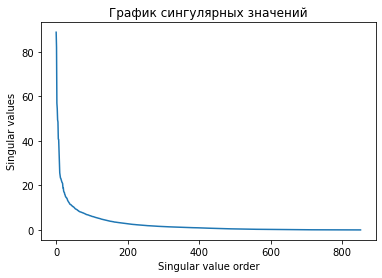

In [12]:
u, s, vh = np.linalg.svd(data, full_matrices=False)
plt.plot(s)
plt.title('График сингулярных значений')
plt.ylabel("Singular values")
plt.xlabel("Singular value order")

**так как после 200 компонент сингулярные значения близки к нуля, можно оставить только 200**

In [14]:
pca = PCA(n_components=200)
final_data = pca.fit_transform(data)